## Produce table with all collected metrics for all available configurations

In [1]:
import pandas as pd
import os
import cPickle as pickle
import matplotlib.pylab as plt
from collections import defaultdict
import re
import numpy as np
from thesis.utils.metrics import *

In [80]:
#ROOT_RESULTS_LOCATION = '/big/s/shalaby/parameter_search_doc2vec_models_new/sample_0.01/'
# ROOT_RESULTS_LOCATION = '/big/s/shalaby/benchmarking_svm/'
# ROOT_RESULTS_LOCATION = '/big/s/shalaby/extended_pv_benchmarking_svm/'
ROOT_RESULTS_LOCATION = '/big/s/shalaby/extended_pv_lda/lda_online_topics_1000_iter_50_batch_4096_decay_0.5_evaluate-every_1000/'
METRICS_PKL_FILE = '{}_test_metrics.pkl'
EPOCH_PREFIX = 'epoch_{}'

DOC2VEC_MAX_EPOCHS = 20

CLASSIFICATION_SEPARATOR = ' ** '

CLASSIFICATION_TYPES_TO_USE = ['subclasses']
METRICS_TO_USE = ['coverage_error', 'f1_micro', 'f1_macro', 
                  'precision_micro', 'precision_macro', 
                  'recall_micro', 'recall_macro', 'top_3', 'top_5']
METRICS_TO_USE = ['coverage_error', 'f1_micro', 'f1_macro', 
                  'top_3', 'top_5']
# METRICS_TO_USE = ['top_3']
# METRICS_TO_USE = ['coverage_error']

In [81]:
def get_subdirectories(d):
    #return filter(os.path.isdir, [f for f in os.listdir(d)])
    return [f for f in os.listdir(d) if os.path.isdir(os.path.join(d,f))]
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [82]:
natural_sort(get_subdirectories(ROOT_RESULTS_LOCATION))

['bm25']

In [83]:
table_rows = []
table_index = []
for classifier in natural_sort(get_subdirectories(ROOT_RESULTS_LOCATION)):
    print classifier
    classifier_path = os.path.join(ROOT_RESULTS_LOCATION, classifier)
    # this will have the structure dict of classifiers -> dict of metrics -> list of values throughout the epoch
    classifier_metrics_dict = dict()
    for preprocessor in natural_sort(get_subdirectories(classifier_path)):
        print preprocessor
        preprocessor_path =  os.path.join(classifier_path, preprocessor)
        
        for classf_type in CLASSIFICATION_TYPES_TO_USE:
            classifier_metrics_file = os.path.join(preprocessor_path, METRICS_PKL_FILE.format(classf_type))
            if os.path.exists(classifier_metrics_file):
                classifier_metrics = pickle.load(open(classifier_metrics_file, 'r'))
                for metric_name in METRICS_TO_USE:
                    metric_full_name = preprocessor + CLASSIFICATION_SEPARATOR + classf_type + CLASSIFICATION_SEPARATOR + metric_name
                    classifier_metrics_dict[metric_full_name] = round(classifier_metrics[metric_name],3)

    table_rows.append(classifier_metrics_dict)
    table_index.append(classifier[:13] + ' ' + classifier[13:20] + ' ' + classifier[20:30] + ' ' + classifier[30:])
        
df = pd.DataFrame(data=table_rows, index=table_index)            
df.transpose()

bm25
svm_iter_10_reg_0.001_classweights_None
svm_iter_10_reg_0.01_classweights_None
svm_iter_10_reg_0.1_classweights_None
svm_iter_30_reg_0.1_classweights_None
svm_iter_100_reg_0.001_classweights_None


,bm25
svm_iter_10_reg_0.1_classweights_None ** subclasses ** coverage_error,165.311
svm_iter_10_reg_0.1_classweights_None ** subclasses ** f1_macro,0.014
svm_iter_10_reg_0.1_classweights_None ** subclasses ** f1_micro,0.266
svm_iter_10_reg_0.1_classweights_None ** subclasses ** top_3,0.161
svm_iter_10_reg_0.1_classweights_None ** subclasses ** top_5,0.384


In [51]:
table_rows = []
table_index = []
for classifier in natural_sort(get_subdirectories(ROOT_RESULTS_LOCATION)):
    print '************* {}'.format(classifier)
    classifier_path = os.path.join(ROOT_RESULTS_LOCATION, classifier)
    # this will have the structure dict of classifiers -> dict of metrics -> list of values throughout the epoch
    classifier_metrics_dict = dict()
    for preprocessor in natural_sort(get_subdirectories(classifier_path)):
        print preprocessor
        preprocessor_path =  os.path.join(classifier_path, preprocessor)
        
        for classf_type in CLASSIFICATION_TYPES_TO_USE:
            classifier_metrics_file = os.path.join(preprocessor_path, METRICS_PKL_FILE.format(classf_type))
            if os.path.exists(classifier_metrics_file):
                classifier_metrics = pickle.load(open(classifier_metrics_file, 'r'))
                print 'Precision Scores: {}'.format(' & '.join([str(round(x,2)) for x in classifier_metrics['precision_scores_array']]))
                print 'Recall Scores: {}'.format(' & '.join([str(round(x,2)) for x in classifier_metrics['recall_scores_array']]))
                print 'F1 Scores: {}'.format(' & '.join([str(round(x,2)) for x in classifier_metrics['f1_scores_array']]))
        print '\n\n'

************* bm25
svm_iter_10_reg_0.001_classweights_None



svm_iter_10_reg_0.01_classweights_None



svm_iter_10_reg_0.1_classweights_None


KeyError: 'precision_scores_array'

In [8]:
df.sort_values(by='sections ** coverage_error', ascending=True)

,Epochs,sections ** coverage_error,sections ** coverage_error -> epoch,sections ** coverage_error range,sections ** f1_macro,sections ** f1_macro -> epoch,sections ** f1_macro range,sections ** f1_micro,sections ** f1_micro -> epoch,sections ** f1_micro range,word2vec result,word2vec result epoch
doc2vec_size_500_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_100_reg_0.01_classweights_balanced,20,3.197,15,0.221,0.548,14,0.038,0.635,14,0.049,2413,9
doc2vec_size_500_w_5_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_10_reg_0.01_classweights_balanced,9,3.264,5,0.088,0.531,7,0.006,0.618,7,0.006,0,0
doc2vec_size_1000_w_8_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_100_reg_0.01_classweights_balanced,13,3.268,6,0.105,0.541,12,0.018,0.630,12,0.018,0,0
doc2vec_size_300_w_8_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_100_reg_0.001_classweights_balanced,20,3.273,13,0.138,0.542,17,0.019,0.631,17,0.027,0,0
doc2vec_size_100_w_8_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_100_reg_0.01_classweights_balanced,20,3.274,20,0.165,0.534,20,0.021,0.621,20,0.028,0,0
doc2vec_size_200_w_8_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_100_reg_0.001_classweights_balanced,20,3.281,19,0.094,0.541,20,0.020,0.628,20,0.023,0,0
doc2vec_size_200_w_8_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_100_reg_0.01_classweights_balanced,20,3.286,20,0.107,0.539,20,0.019,0.625,20,0.023,0,0
doc2vec_size_300_w_5_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_1000_reg_0.01_classweights_balanced,20,3.294,17,0.072,0.536,17,0.013,0.623,17,0.015,0,0
doc2vec_size_200_w_12_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_100_reg_0.01_classweights_balanced,13,3.302,8,0.102,0.530,12,0.010,0.616,1,0.012,0,0
doc2vec_size_300_w_5_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None / svm_iter_100_reg_0.001_classweights_balanced,20,3.307,14,0.121,0.537,20,0.018,0.625,19,0.018,0,0


In [ ]:
table_rows = []
table_index = []
for classifier in natural_sort(get_subdirectories(ROOT_RESULTS_LOCATION)):
    print classifier
    classifier_path = os.path.join(ROOT_RESULTS_LOCATION, classifier)
    # this will have the structure dict of classifiers -> dict of metrics -> list of values throughout the epoch
    classifier_metrics_dict = dict()
    for preprocessor in natural_sort(get_subdirectories(classifier_path)):
        print preprocessor
        preprocessor_path =  os.path.join(classifier_path, preprocessor)
        
        for classf_type in CLASSIFICATION_TYPES_TO_USE:
            classifier_metrics_file = os.path.join(preprocessor_path, METRICS_PKL_FILE.format(classf_type))
            if os.path.exists(classifier_metrics_file):
                classifier_metrics = pickle.load(open(classifier_metrics_file, 'r'))
                for metric_name in METRICS_TO_USE:
                    metric_full_name = preprocessor + CLASSIFICATION_SEPARATOR + classf_type + CLASSIFICATION_SEPARATOR + metric_name
                    classifier_metrics_dict[metric_full_name] = round(classifier_metrics[metric_name],2)

    table_rows.append(classifier_metrics_dict)
    table_index.append(classifier[:15] + ' ' + classifier[15:30] + ' ' + classifier[30:])
        
df = pd.DataFrame(data=table_rows, index=table_index)            
df.transpose()

In [65]:
[d['section'] for d in method_word2vec_results]

[u'capital-common-countries',
 u'capital-world',
 u'currency',
 u'city-in-state',
 u'family',
 u'gram1-adjective-to-adverb',
 u'gram2-opposite',
 u'gram3-comparative',
 u'gram4-superlative',
 u'gram5-present-participle',
 u'gram6-nationality-adjective',
 u'gram7-past-tense',
 u'gram8-plural',
 u'gram9-plural-verbs',
 'total']

In [13]:
pd.DataFrame([{'dd':2,'ee':3,'ff':4},{'dd':2,'ee':3}], index=['sdfsf','sdlfsdfsdf'])

,dd,ee,ff
sdfsf,2,3,4.0
sdlfsdfsdf,2,3,NaN


In [14]:
#direc_prefix = '/big/s/shalaby/parameter_search_doc2vec_models/sample_0.0001/doc2vec_size_3000_w_12_type_dm_concat_1_mean_0_trainwords_1_hs_0_neg_10_vocabsize_None_curriter_{}'
#direc_prefix = '/big/s/shalaby/parameter_search_doc2vec_models/sample_0.0001/doc2vec_size_3000_w_8_type_dm_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None_curriter_{}'
direc_prefix = '/big/s/shalaby/parameter_search_doc2vec_models/sample_0.0001/doc2vec_size_3000_w_8_type_dm_concat_0_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None_curriter_{}'
import shutil
#to_delete = [8,9,10,11]
to_delete = range(15,30)

for i in to_delete:
    direc = direc_prefix.format(i)
    if os.path.exists(direc):
        model_folder_path = os.path.join(direc, "model")
        if os.path.exists(os.path.join(direc, "model.syn0.npy")):
            print "deleting {}".format(i)
            os.remove(model_folder_path)
            #os.remove(os.path.join(direc, "model.docvecs.doctag_syn0.npy"))
            os.remove(os.path.join(direc, "model.syn0.npy"))
            os.remove(os.path.join(direc, "model.syn1neg.npy"))

## Show Graph for specific configuration

In [28]:
natural_sort(get_subdirectories(ROOT_RESULTS_LOCATION))

['doc2vec_size_200_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None',
 'doc2vec_size_200_w_8_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None',
 'doc2vec_size_500_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None',
 'doc2vec_size_500_w_8_type_pv-dbow_concat_1_mean_0_trainwords_0_hs_0_neg_10_vocabsize_None',
 'doc2vec_size_1000_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None',
 'vocab_model']

<IPython.core.display.Javascript object>


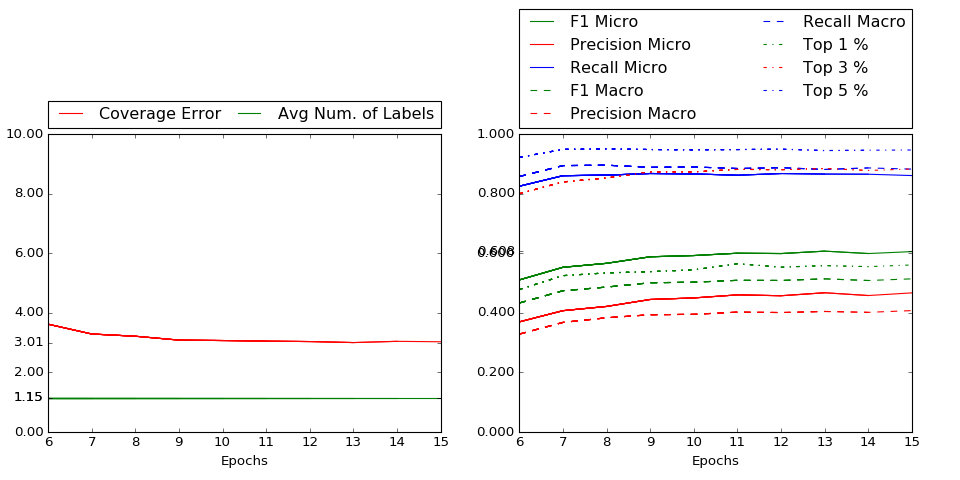

/big/s/shalaby/parameter_search_doc2vec_models_new/full/doc2vec_size_200_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None/epoch_6/svm_iter_1_reg_0.01_classweights_balanced
Epoch 06: Coverage Error -> 3.62


/home/s/shalaby/.virtualenv/thesis-env/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=6, right=6
  'left=%s, right=%s') % (left, right))


/big/s/shalaby/parameter_search_doc2vec_models_new/full/doc2vec_size_200_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None/epoch_7/svm_iter_1_reg_0.01_classweights_balanced
Epoch 07: Coverage Error -> 3.29
/big/s/shalaby/parameter_search_doc2vec_models_new/full/doc2vec_size_200_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None/epoch_8/svm_iter_1_reg_0.01_classweights_balanced
Epoch 08: Coverage Error -> 3.22
/big/s/shalaby/parameter_search_doc2vec_models_new/full/doc2vec_size_200_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None/epoch_9/svm_iter_1_reg_0.01_classweights_balanced
Epoch 09: Coverage Error -> 3.09
/big/s/shalaby/parameter_search_doc2vec_models_new/full/doc2vec_size_200_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None/epoch_10/svm_iter_1_reg_0.01_classweights_balanced
Epoch 10: Coverage Error -> 3.07
/big/s/shalaby/parameter_search_doc2vec_models_new/full/doc2vec_size_200_w_8_type_dm_concat_0_mean_1_tr

In [30]:
%matplotlib notebook
graph = MetricsGraph()
graph.init_graph()


doc2vec_approach = "doc2vec_size_200_w_8_type_dm_concat_0_mean_1_trainwords_0_hs_0_neg_10_vocabsize_None"
classifier_approach = "svm_iter_1_reg_0.01_classweights_balanced"
classification_type = "sections"
print "sdfsdfsf"
for epoch in range(6,DOC2VEC_MAX_EPOCHS+1):
    try:
        metrics_folder = os.path.join(ROOT_RESULTS_LOCATION, doc2vec_approach, EPOCH_PREFIX.format(epoch), classifier_approach)
        print metrics_folder
        metrics = pickle.load(open(os.path.join(metrics_folder, METRICS_PKL_FILE.format(classification_type))))
        print "Epoch {:02d}: Coverage Error -> {:.2f}".format(epoch, metrics['coverage_error'])
        graph.add_metrics_to_graph(metrics, epoch)
    except IOError:
        break